In [1]:
import pandas as pd                         #relevent libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('adult.csv')
pd.set_option('max_columns', None)

In [4]:
data #15 features and 48842 instances 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data[data == '?'].count()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

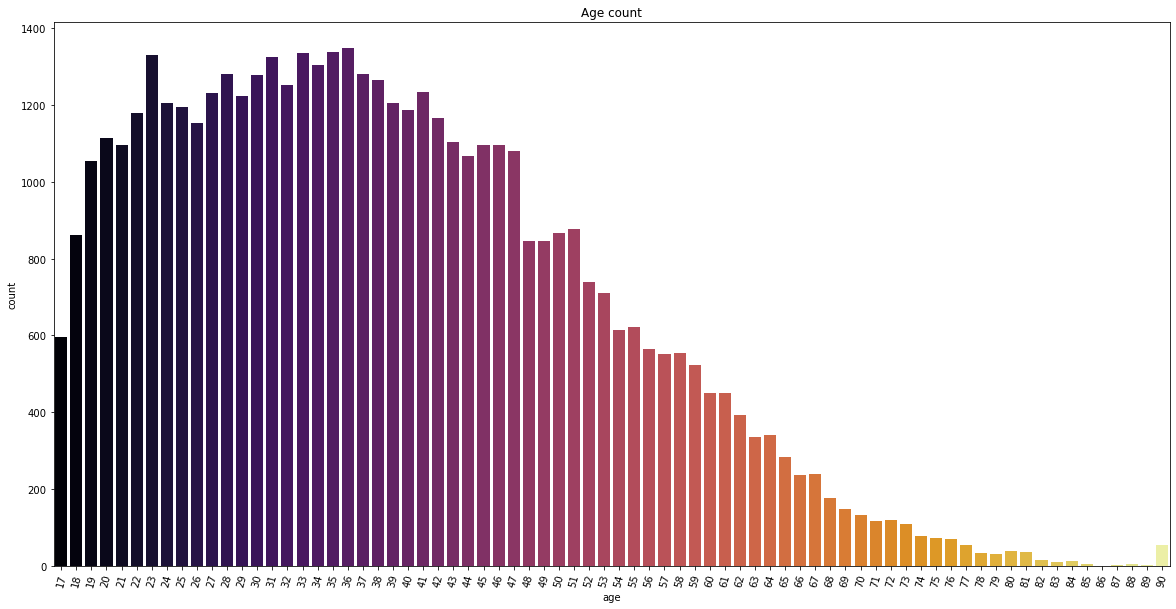

In [10]:
plt.figure(figsize=(20,10))          #age distribution in dataset
plt.xticks(rotation = 75)
plt.title('Age count')
sns.countplot(data.age,palette='inferno')
plt.show()

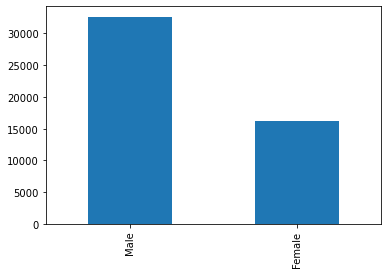

In [11]:
data['gender'].value_counts().plot(kind='bar')           #more male than female

# Data cleaning and preprocessing

In [12]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

In [13]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

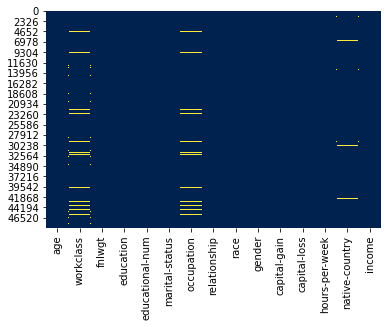

In [14]:
sns.heatmap(data.isnull(),cbar=False, cmap='cividis') #heatmap to see missing values

In [15]:
print(data['income'].unique())

['<=50K' '>50K']


In [16]:
def income_to_numeric(x):              # income <=$50,000 : 0
    if x =='<=50K':                    # income >=$50,000 : 1
        return 0
    if x =='>50K':
        return 1
    else:
        return x

data["income"] = data["income"].apply(income_to_numeric)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


In [17]:
print(data['gender'].unique())

['Male' 'Female']


In [18]:
def gender_to_numeric(x):        #Male will be 0, Female will be 1
    if x =='Male':
        return 0
    if x =='Female':
        return 1
    else:
        return x

data["gender"] = data["gender"].apply(gender_to_numeric)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,1,0,0,30,United-States,0


In [19]:
print(data['race'].unique())

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [20]:
def race_to_numeric(x): #Black = 0, White = 1, Asian-Pac-Islander = 2, Other = 3, Amer-Indian-Eskimo = 4
    if x == "Black":
        return 0
    if x == "White":
        return 1
    if x == "Asian-Pac-Islander":
        return 2
    if x == "Other":
        return 3
    if x == "Amer-Indian-Eskimo":
        return 4
    else: 
        return 
    
data["race"] = data["race"].apply(race_to_numeric)
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,1,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,0,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,1,1,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,1,0,0,0,30,United-States,0
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,0,0,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,1,0,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,1,1,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,1,0,0,0,10,United-States,0


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
labelencoder1 = LabelEncoder()
labelencoder2 = LabelEncoder()
labelencoder3 = LabelEncoder()

In [23]:
data['workclass_n'] = labelencoder1.fit_transform(data['workclass'])
data['education_n'] = labelencoder2.fit_transform(data['education'])
data['occupation_n'] = labelencoder3.fit_transform(data['occupation'])
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_n,education_n,occupation_n
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,0,0,0,0,40,United-States,0,3,1,6
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,1,0,0,0,50,United-States,0,3,11,4
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,1,0,0,0,40,United-States,1,1,7,10
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,0,0,7688,0,40,United-States,1,3,15,6
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,1,1,0,0,30,United-States,0,8,15,14


In [24]:
df = data.drop(['workclass','occupation', 'capital-gain', 'capital-loss', 'native-country', 'fnlwgt','education', 'marital-status', 'relationship'], axis='columns')
df

,age,educational-num,race,gender,hours-per-week,income,workclass_n,education_n,occupation_n
0,25,7,0,0,40,0,3,1,6
1,38,9,1,0,50,0,3,11,4
2,28,12,1,0,40,1,1,7,10
3,44,10,0,0,40,1,3,15,6
4,18,10,1,1,30,0,8,15,14
...,...,...,...,...,...,...,...,...,...
48837,27,12,1,1,38,0,3,7,12
48838,40,9,1,0,40,1,3,11,6
48839,58,9,1,1,40,0,3,11,0
48840,22,9,1,0,20,0,3,11,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   educational-num  48842 non-null  int64
 2   race             48842 non-null  int64
 3   gender           48842 non-null  int64
 4   hours-per-week   48842 non-null  int64
 5   income           48842 non-null  int64
 6   workclass_n      48842 non-null  int32
 7   education_n      48842 non-null  int32
 8   occupation_n     48842 non-null  int32
dtypes: int32(3), int64(6)
memory usage: 2.8 MB


# Decision Tree - Can deal with categorical variables and missing values 

Continuous variables are variables that can have an infinite number of possible values, as opposed to discrete variables which can only have a specified range of values. 
An example of a continuous variable would be the number of miles that a car has driven in its lifetime.

In [26]:
features = ["income","age", "educational-num", "race", "gender", "hours-per-week", "workclass_n", "education_n", "occupation_n"]
df = df[features]
df.head(10)

,income,age,educational-num,race,gender,hours-per-week,workclass_n,education_n,occupation_n
0,0,25,7,0,0,40,3,1,6
1,0,38,9,1,0,50,3,11,4
2,1,28,12,1,0,40,1,7,10
3,1,44,10,0,0,40,3,15,6
4,0,18,10,1,1,30,8,15,14
5,0,34,6,1,0,30,3,0,7
6,0,29,9,0,0,40,8,11,14
7,1,63,15,1,0,32,5,14,9
8,0,24,10,1,1,40,3,15,7
9,0,55,4,1,0,10,3,5,2


In [27]:
X = df.drop('income', axis=1)
y = df['income']

In [28]:
X

,age,educational-num,race,gender,hours-per-week,workclass_n,education_n,occupation_n
0,25,7,0,0,40,3,1,6
1,38,9,1,0,50,3,11,4
2,28,12,1,0,40,1,7,10
3,44,10,0,0,40,3,15,6
4,18,10,1,1,30,8,15,14
...,...,...,...,...,...,...,...,...
48837,27,12,1,1,38,3,7,12
48838,40,9,1,0,40,3,11,6
48839,58,9,1,1,40,3,11,0
48840,22,9,1,0,20,3,11,0


In [29]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
X_train.shape # 34189 train

(34189, 8)

In [33]:
X_test.shape # 14653 test

(14653, 8)

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
default_tree = DecisionTreeClassifier()
default_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
default_tree.get_params()  #default parameters 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [36]:
predictions = default_tree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score #performance matrix 
accuracy_score(y_test, predictions)   #score with default max_depth

0.7657135057667371

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions, labels=[0,1])

array([[9612, 1621],
       [1812, 1608]], dtype=int64)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     11233
           1       0.50      0.47      0.48      3420

    accuracy                           0.77     14653
   macro avg       0.67      0.66      0.67     14653
weighted avg       0.76      0.77      0.76     14653



In [40]:
tree1 = DecisionTreeClassifier(max_depth=2)   
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [41]:
tree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [42]:
predictions1 = tree1.predict(X_test)
predictions1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
accuracy_score(y_test, predictions1)     #score with max_depth = 10

0.7883709820514571

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': range(2,20), 'max_depth': range(2,20), }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 20),
                         'max_leaf_nodes': range(2, 20)},
             return_train_score=True)

In [45]:
best_tree_cv = grid.best_estimator_
best_tree_cv_plot = export_graphviz(best_tree_cv, out_file=None, feature_names=features[1:])
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15}

In [46]:
tree2 = DecisionTreeClassifier(max_depth=5)   
tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
tree2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
predictions2 = tree2.predict(X_test)
predictions2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
accuracy_score(y_test, predictions2)  

0.8097317955367501

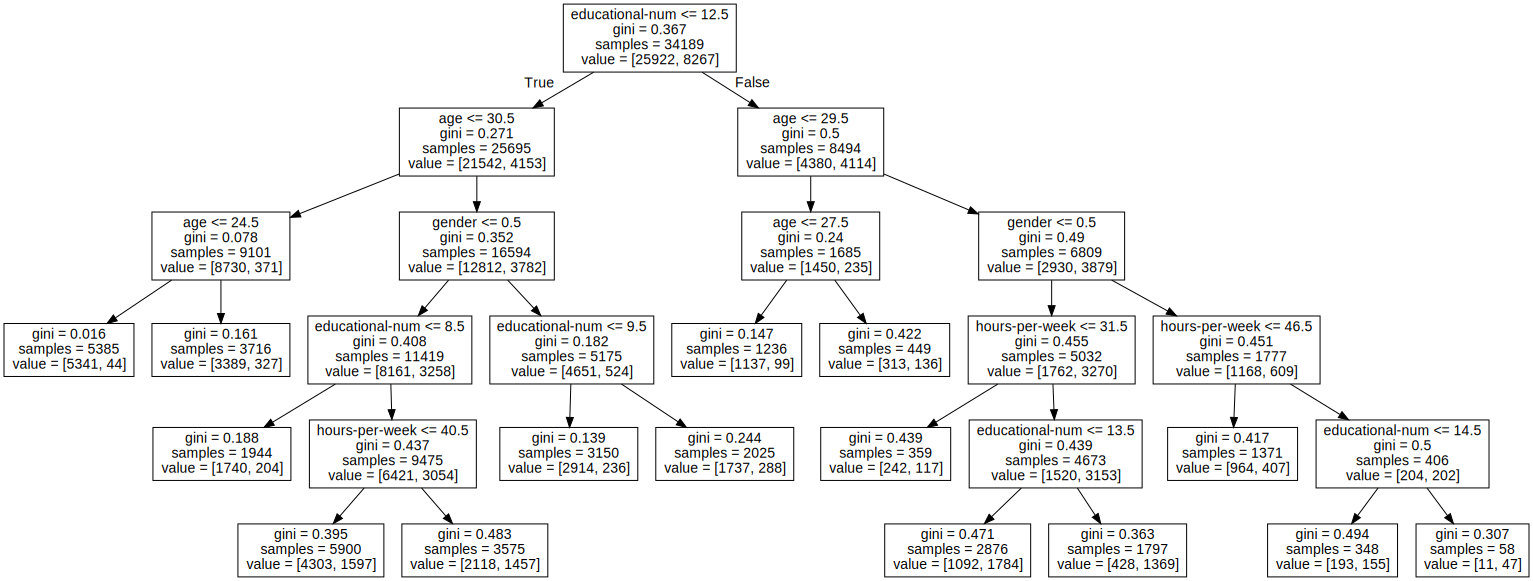

In [50]:
import graphviz
graphviz.Source(best_tree_cv_plot)

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, random_state=42) #number of trees(10) befor averages of predictions 
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [52]:
pred = classifier.predict(X_test)   # predict on the test set

In [53]:
accuracy_score(y_test, pred)

0.7928751791442026

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     11233
           1       0.57      0.48      0.52      3420

    accuracy                           0.79     14653
   macro avg       0.71      0.68      0.69     14653
weighted avg       0.78      0.79      0.79     14653



In [55]:
class100 = RandomForestClassifier(n_estimators=20, random_state=42) # parameter with 20 n_estimators

In [56]:
class100.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [57]:
pred100 = class100.predict(X_test)

In [58]:
accuracy_score(y_test, pred100)

0.7947860506380946